In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Load data
df_pooldata = pd.read_csv("#1_Pool_Water.csv")
df_drinkingwater = pd.read_csv("#2-drinkingwater.csv")
df_soapwater = pd.read_csv("#3-contaminatedwaterwithsoap.csv")

print(df_pooldata.to_string()) 

          DO         RTD           EC        PH           ORP
0   DO: 0.00  RTD: 25.30  EC: 6658.00  PH: 6.95  ORP: -217.00
1   DO: 3.35  RTD: 25.30  EC: 6662.00  PH: 6.95  ORP: -217.00
2   DO: 3.35  RTD: 25.30  EC: 6661.00  PH: 6.95  ORP: -217.00
3   DO: 3.35  RTD: 25.29  EC: 6665.00  PH: 6.95  ORP: -216.30
4   DO: 3.35  RTD: 25.30  EC: 6656.00  PH: 6.95  ORP: -213.20
5   DO: 3.35  RTD: 25.32  EC: 6661.00  PH: 6.94  ORP: -214.30
6   DO: 3.35  RTD: 25.35  EC: 6657.00  PH: 6.94  ORP: -214.70
7   DO: 3.35  RTD: 25.50  EC: 6653.00  PH: 6.94  ORP: -214.80
8   DO: 3.59  RTD: 25.51  EC: 6654.00  PH: 6.95  ORP: -215.00
9   DO: 3.35  RTD: 25.53  EC: 6654.00  PH: 6.95  ORP: -215.20
10  DO: 3.35  RTD: 25.55  EC: 6654.00  PH: 6.95  ORP: -215.30
11  DO: 3.59  RTD: 25.58  EC: 6653.00  PH: 6.95  ORP: -215.30
12  DO: 3.83  RTD: 25.60  EC: 6652.00  PH: 6.95  ORP: -215.50
13  DO: 3.35  RTD: 25.61  EC: 6648.00  PH: 6.95  ORP: -215.50
14  DO: 3.59  RTD: 25.62  EC: 6633.00  PH: 6.95  ORP: -215.50
15  DO: 

In [12]:
# Drop empty values
def drop_empty(df):
    df.dropna(inplace=True)
    #df = df.drop(df.columns[[5]], axis=1)

drop_empty(df_pooldata)
drop_empty(df_drinkingwater)
drop_empty(df_soapwater)
print(df_pooldata)

          DO         RTD           EC        PH           ORP
0   DO: 0.00  RTD: 25.30  EC: 6658.00  PH: 6.95  ORP: -217.00
1   DO: 3.35  RTD: 25.30  EC: 6662.00  PH: 6.95  ORP: -217.00
2   DO: 3.35  RTD: 25.30  EC: 6661.00  PH: 6.95  ORP: -217.00
3   DO: 3.35  RTD: 25.29  EC: 6665.00  PH: 6.95  ORP: -216.30
4   DO: 3.35  RTD: 25.30  EC: 6656.00  PH: 6.95  ORP: -213.20
..       ...         ...          ...       ...           ...
77  DO: 3.83  RTD: 25.68  EC: 6569.00  PH: 6.83  ORP: -209.70
78  DO: 3.83  RTD: 25.68  EC: 6579.00  PH: 6.82  ORP: -209.70
79  DO: 3.59  RTD: 25.68  EC: 6571.00  PH: 6.83  ORP: -209.70
80  DO: 3.59  RTD: 25.67  EC: 6568.00  PH: 6.82  ORP: -208.90
81  DO: 3.35  RTD: 25.67  EC: 6540.00  PH: 6.81  ORP: -208.90

[82 rows x 5 columns]


In [13]:
def format_string(s):
    s = s.strip()
    if ":" in s:
        i = s.find(":") + 1
        s = s[i:]
        try:
            s = float(s)
        except:
            print("cannot convert",s)
    return s      

In [14]:
# Reformat data in each column
def format_data(df):
  for column_name in df.columns:
    for x in range(len(df[column_name])):
      s = df.at[x, column_name]
      df.at[x, column_name] = format_string(s)

format_data(df_pooldata)
format_data(df_drinkingwater)
format_data(df_soapwater)

print(df_pooldata.to_string())
#df.to_csv('final_data.csv')


      DO    RTD      EC    PH    ORP
0    0.0   25.3  6658.0  6.95 -217.0
1   3.35   25.3  6662.0  6.95 -217.0
2   3.35   25.3  6661.0  6.95 -217.0
3   3.35  25.29  6665.0  6.95 -216.3
4   3.35   25.3  6656.0  6.95 -213.2
5   3.35  25.32  6661.0  6.94 -214.3
6   3.35  25.35  6657.0  6.94 -214.7
7   3.35   25.5  6653.0  6.94 -214.8
8   3.59  25.51  6654.0  6.95 -215.0
9   3.35  25.53  6654.0  6.95 -215.2
10  3.35  25.55  6654.0  6.95 -215.3
11  3.59  25.58  6653.0  6.95 -215.3
12  3.83   25.6  6652.0  6.95 -215.5
13  3.35  25.61  6648.0  6.95 -215.5
14  3.59  25.62  6633.0  6.95 -215.5
15  3.59  25.63  6653.0  6.95 -215.6
16  3.59  25.65  6642.0  6.95 -215.5
17  3.59  25.65  6640.0  6.94 -215.5
18  3.59  25.66  6645.0  6.94 -215.6
19  3.59  25.67  6643.0  6.94 -215.8
20  3.35  25.68  6644.0  6.94 -215.8
21  3.59  25.68  6652.0  6.93 -215.8
22  3.59  25.69  6646.0  6.93 -215.8
23  3.35  25.69  6645.0  6.93 -215.9
24  3.59  25.69  6646.0  6.93 -216.0
25  3.59   25.7  6643.0  6.93 -215.7
2

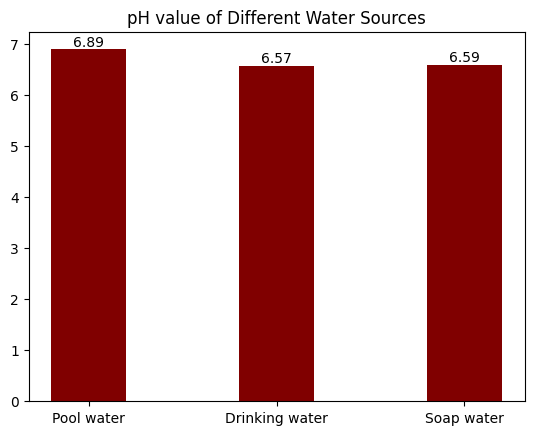

In [21]:
# pH plot
pool_ph = df_pooldata["PH"]
drinkingwater_ph = df_drinkingwater["PH"]
soap_water_ph = df_soapwater["PH"]

ph_values = {"Pool water":round(pool_ph.mean(),2), "Drinking water":round(drinkingwater_ph.mean(),2), "Soap water":round(soap_water_ph.mean(),2)}

# creating the bar plot
bars_ph = plt.bar(ph_values.keys(), ph_values.values(), color ='maroon',width = 0.4) 

for bar in bars_ph:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, yval, ha='center', va='bottom', fontsize=10, color='black')

# plt.xlabel("Type of water")
# plt.ylabel("Mean temperature value")
plt.title("pH value of Different Water Sources")
plt.show()

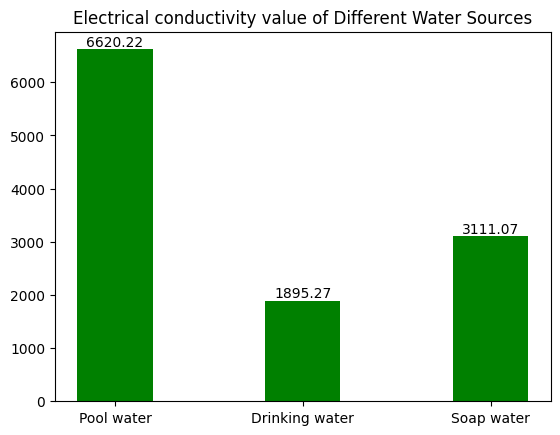

In [22]:
# EC plot
pool_EC = df_pooldata["EC"]
drinkingwater_EC = df_drinkingwater["EC"]
soap_water_EC = df_soapwater["EC"]

EC_values = {"Pool water":round(pool_EC.mean(),2), "Drinking water":round(drinkingwater_EC.mean(),2), "Soap water":round(soap_water_EC.mean(),2)}

# creating the bar plot
bars_ec = plt.bar(EC_values.keys(), EC_values.values(), color ='green',width = 0.4) 

for bar in bars_ec:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, yval, ha='center', va='bottom', fontsize=10, color='black')

# plt.xlabel("Type of water")
# plt.ylabel("Mean temperature value")
plt.title("Electrical conductivity value of Different Water Sources")
plt.show()


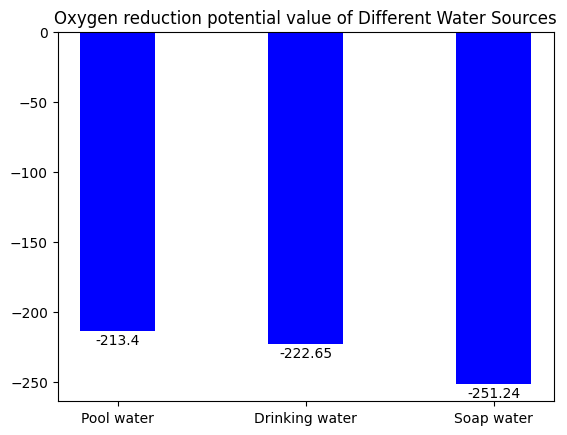

In [24]:
# ORP plot
pool_ORP = df_pooldata["ORP"]
drinkingwater_ORP = df_drinkingwater["ORP"]
soap_water_ORP = df_soapwater["ORP"]

ORP_values = {"Pool water":round(pool_ORP.mean(),2), "Drinking water":round(drinkingwater_ORP.mean(),2), "Soap water":round(soap_water_ORP.mean(),2)}

# creating the bar plot
bars_ORP = plt.bar(ORP_values.keys(), ORP_values.values(), color ='blue',width = 0.4) 

for bar in bars_ORP:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval - 12, yval, ha='center', va='bottom', fontsize=10, color='black')

# plt.xlabel("Type of water")
# plt.ylabel("Mean temperature value")
plt.title("Oxygen reduction potential value of Different Water Sources")
plt.show()

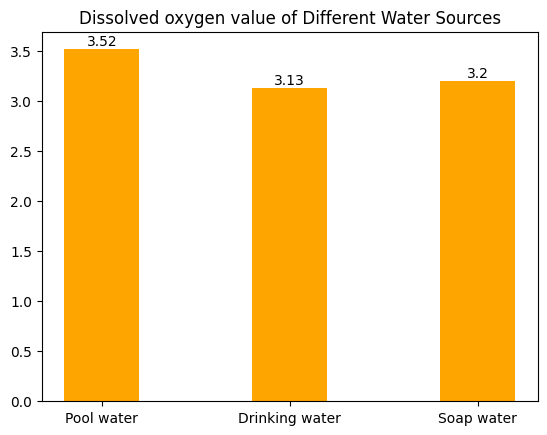

In [25]:
# DO plot
pool_DO = df_pooldata["DO"]
drinkingwater_DO = df_drinkingwater["DO"]
soap_water_DO = df_soapwater["DO"]

DO_values = {"Pool water":round(pool_DO.mean(),2), "Drinking water":round(drinkingwater_DO.mean(),2), "Soap water":round(soap_water_DO.mean(),2)}

# creating the bar plot
bars_DO = plt.bar(DO_values.keys(), DO_values.values(), color ='orange',width = 0.4) 
for bar in bars_DO:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, yval, ha='center', va='bottom', fontsize=10, color='black')

# plt.xlabel("Type of water")
# plt.ylabel("Mean temperature value")
plt.title("Dissolved oxygen value of Different Water Sources")
plt.show()